In [ ]:
library(dplyr)
library(tidyr)
library(purrr)
library(pheatmap)


In [ ]:
#########对所有AS事件进行分类（按照其跟随发育时间的变化程度）
#PSI > 0.9 (all times)(no change)
#max(PSI) - min(PSI) < 0.1 (stable)
#max(PSI) - min(PSI) >=0.1 and Cor(X,L) > 0.7 (continous up)
#max(PSI) - min(PSI) >=0.1 and Cor(X,L) < -0.7 (continous down)
data <- read.table("/disk1/wenqing/tmp_data/PFC_s2/salmon_output_untrimmed_ver/project_events_untrimmed_ver.psi",row.names=NULL)
rownames(data) <- data[,1]
data <- data[,-1]
head(data)


In [3]:
data[is.na(data)] <- 0
data <- data[rowSums(data)!=0,]
dim(data)

[1] 68747    12

In [4]:
head(data)

,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15;A5:chrX:100635746-100636608:100635746-100636793:-,1,1,0,1,1.0000000,1,1,1,1,1.000000000,1,1
ENSG00000000003.15;SE:chrX:100630866-100632485:100632568-100633405:-,1,1,0,1,1.0000000,1,1,1,1,1.000000000,1,1
ENSG00000000419.13;A3:chr20:50940955-50941105:50940933-50941105:-,1,1,1,1,0.0000000,1,1,0,1,0.987618524,1,1
ENSG00000000419.13;A3:chr20:50940955-50942031:50940933-50942031:-,0,0,0,0,0.5916562,0,0,0,0,0.000000000,0,0
ENSG00000000419.13;A5:chr20:50940933-50941105:50940933-50941129:-,0,0,0,0,0.0000000,0,0,0,0,0.008303274,0,0
ENSG00000000419.13;SE:chr20:50940933-50941105:50941209-50942031:-,0,0,0,0,0.0000000,0,0,0,0,1.000000000,0,0


In [5]:
df <- data %>%
  rowwise() %>%
  mutate(diff_PSI = max(c_across(starts_with("GW"))) - min(c_across(starts_with("GW"))))

In [6]:
# 生成L序列，L代表时间点的均匀分布，从1到n（n为列数）
L_sequence <- seq(0,1,length.out=ncol(data))

# 定义一个函数来计算单行的X与L的相关性
calc_correlation <- function(row) {
  cor(row, L_sequence, method = "pearson")
}


In [ ]:
cor_value <- apply(data,1,calc_correlation)

In [8]:
psi_no_change <- function(row){
  pass_flag_num <- length(which(row > 0.9))
  if(pass_flag_num > 0.8*12){
    return(1)
  }
  else{
    return(0)
  }
}

In [9]:
no_change_index <- apply(data,1,psi_no_change)

In [10]:
cor_value[is.na(cor_value)] <- 0

In [11]:
df$cor_value <- cor_value
df$change_index <- no_change_index
#change_index=1:没有变换，=0:有变化

In [12]:
df <- as.data.frame(df)
rownames(df) <- rownames(data)

In [13]:
##psi没变化的event
no_change_event <- df[which(df$change_index == 1),]
stable_event <- df[which(df$diff_PSI < 0.1),]
up_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value > 0.7),]
down_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value < -0.7),]

In [15]:
write.table(up_event,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/psi_up_events.txt",quote=F,sep='\t')
write.table(down_event,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/psi_down_events.txt",quote=F,sep='\t')
write.table(stable_event,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/psi_stable_events.txt",quote=F,sep='\t')
write.table(no_change_event,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/psi_no_change_events.txt",quote=F,sep='\t')

In [130]:
dim(no_change_event)
dim(stable_event)
dim(up_event)
dim(down_event)
dim(df)

[1] 9272   15

[1] 5627   15

[1] 467  15

[1] 91 15

[1] 68747    15

In [181]:
change_event <- rbind(up_event,down_event)
change_event_data <- data[rownames(change_event),]


In [182]:
group <- c(rep('Up',467),rep('Down',91))
group

[1] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [11] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [21] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [31] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [41] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [51] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [61] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [71] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [81] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
 [91] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[101] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[111] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[121] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[131] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[141] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[151] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[161] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[171] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[181] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[191] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[201] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[211] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[221] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[231] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[241] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[251] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[261] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[271] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[281] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[291] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[301] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[311] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[321] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[331] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[341] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[351] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[361] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[371] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[381] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[391] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[401] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[411] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[421] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[431] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[441] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[451] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"  
[461] "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Down" "Down" "Down"
[471] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[481] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[491] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[501] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[511] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[521] "Down" "Down" "Down" "Down" "Down" "Down" "D

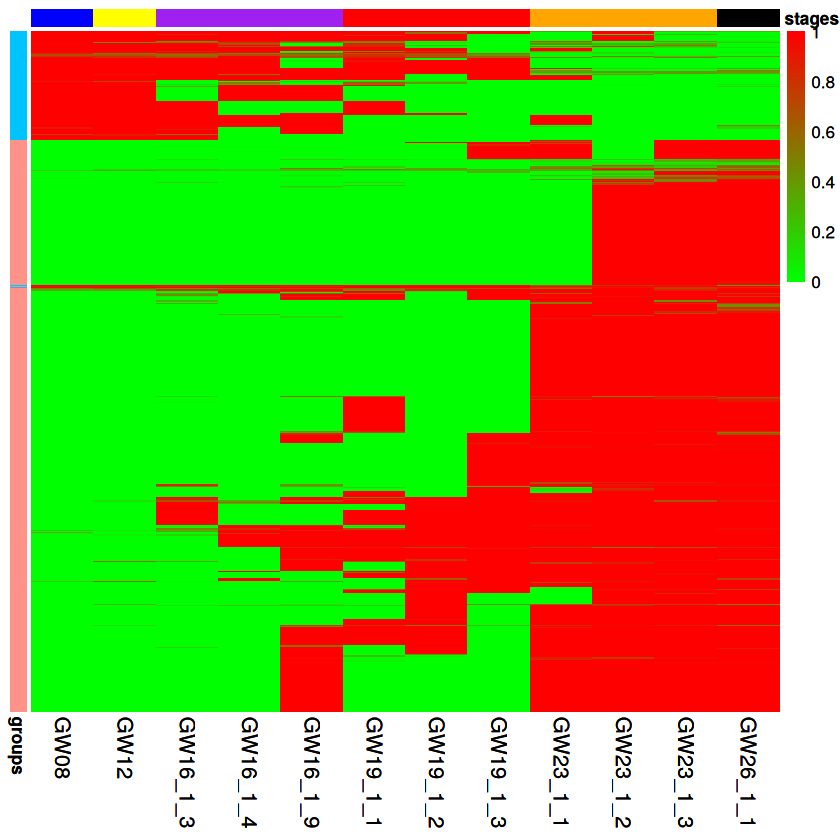

In [191]:
my_palette <- colorRampPalette(c("green", "red"))(n = 100)  # 创建自定义颜色梯度，100级颜色 
annotation_col = data.frame(
  stages = c('week8','week12',rep('week16',3),rep('week19',3),rep('week23',3),'week26')
  #color = c('blue','yellow',rep('purple',3),rep('red',3),rep('orange',3),'black')
)
rownames(annotation_col) = colnames(change_event_data)
color_mapping <- list(stages=c(week8 = "blue", week12 = "yellow", week16 = "purple", week19 = 'red', week23 = 'orange', week26 = 'black')) 


annotation_row = data.frame(
  groups = group
  #color = c('blue','yellow',rep('purple',3),rep('red',3),rep('orange',3),'black')
)
rownames(annotation_row) = rownames(change_event_data)
color_mapping_for_rows <- list(groups=c(Up = "black", Down = "purple")) 


#pdf("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/de_edited_sites.pdf")
heatmap <- pheatmap(change_event_data,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         show_colnames = TRUE,
         show_rownames = FALSE,
         #cellheight = 0.5,
         color = my_palette,
         #fontsize_row = 6,          # 行标签字体大小
         fontsize_col = 13,          # 列标签字体大小
         border_color = NA,    # 边框颜色
         cell_border_color = "grey",
         #alpha = 0.8,             # 颜色透明度
         treeheight_row = 0,
         annotation_col = annotation_col,
         annotation_colors =  color_mapping,
         annotation_legend = FALSE, 
         annotation_names_col = TRUE,# 添加列注释
         #main = "SE",
         #main = "Customized Heatmap", # 图表标题
         #legend_breaks = seq(min(de_data), max(de_data), length.out = 5), # 图例刻度
         legend_labels = 'PSI', # 图例标签,
         annotation_row = annotation_row, # 提供行注释的数据
         annotation_colors_row = color_mapping_for_rows # 行注释的颜色映射
)
heatmap


In [193]:
write.table(change_event_data,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/psi_change_event.txt",quote=F,sep='\t')

In [196]:
########找到psi有变化的event后，最重要的是看他们和编辑有没有联系
#所以得先看有没有编辑位点落在这些地方？？？？？？
#个别事件后面寻找，先找相关性
#统计AS事件分类、占比
stats_dat <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_change/only_events.txt")[,1]
head(stats_dat)

[1] "A3" "A5" "RI" "RI" "A3" "AF"

In [210]:
colors=c("#840dd3","#04c49c","#2759bd","#FFB400","#AED6F1","#D4AE5D","#964B00")

In [205]:
library(ggplot2)

# 将数据转换为数据框
df <- data.frame(categories = names(table(stats_dat)), values = table(stats_dat))
colnames(df) <- c('categories','group','values')
df

categories,group,values
<chr>,<fct>,<int>
A3,A3,66
A5,A5,47
AF,AF,201
AL,AL,72
MX,MX,7
RI,RI,25
SE,SE,140


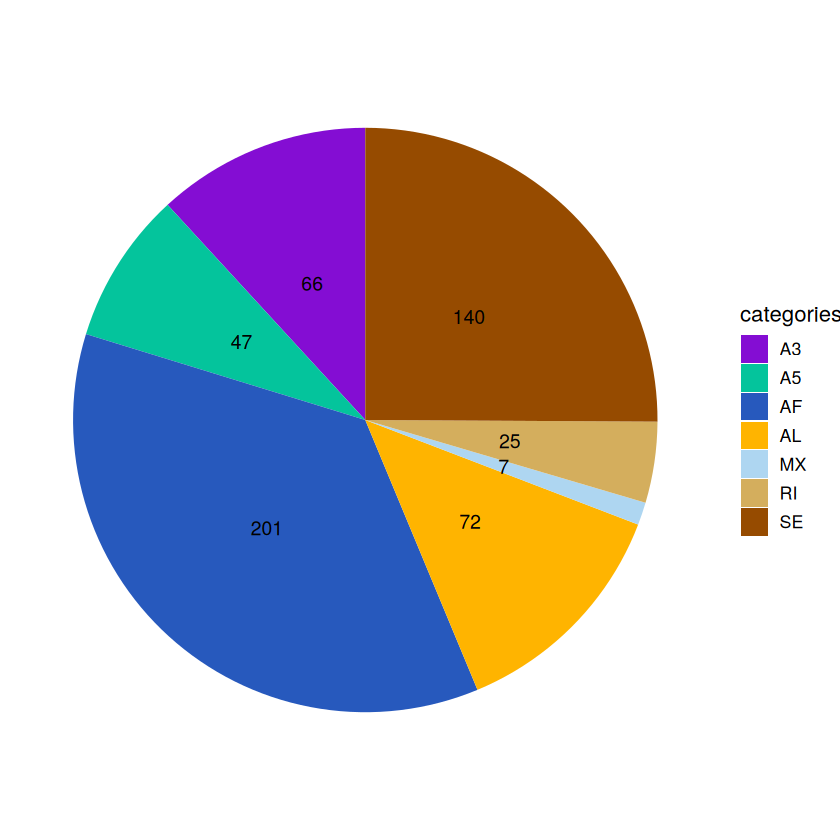

In [215]:

# 绘制饼图
ggplot(df, aes(x = "", y = values, fill = categories)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  geom_text(aes(label =values), 
            position = position_stack(vjust = 0.5), size = 4) +
  scale_fill_manual(values = colors)+
  theme(text = element_text(size = 13)) 

In [2]:
######通过与剪接通路相关的4个基因的网络互作蛋白（from string）看其他蛋白的psi变化
#先提取从string中获得的与4个基因形成互作网络的其他基因
protein_name <- read.table("/disk1/wenqing/tmp_data/string/ensmbl_ids_related_4_genes.txt")[,1]
head(protein_name)

[1] "ENSG00000005007.14" "ENSG00000077312.9"  "ENSG00000096401.8" 
[4] "ENSG00000100028.12" "ENSG00000101161.8"  "ENSG00000101343.15"

In [3]:
#提取这些基因的psi矩阵
A3_psi <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/A3_psi.txt")
dim(A3_psi)

[1] 20837    12

In [4]:
# 定义函数
extract_rows_with_pattern <- function(data, pattern_list) {
  # 使用grep函数找出匹配模式的行名索引
  all_matching_res <- c()
  for(one in pattern_list){
    matching_rows <- grep(one, rownames(data), value = TRUE)
    all_matching_res <- c(all_matching_res,matching_rows)
  }
  
  # 根据匹配的行名索引提取数据框的子集
  subset_data <- data[all_matching_res, ]
  
  # 返回提取的子数据框
  return(subset_data)
}


In [56]:
##根据ENSMBL ID提取子矩阵
sub_A3_psi <- extract_rows_with_pattern(A3_psi,protein_name)

In [57]:
dim(sub_A3_psi)
head(sub_A3_psi)

[1] 25 12

,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,1,1,1,1,1.0000000,1,0.9869851,1.0000000,1,NA,0,1.0000000
ENSG00000077312.9;A3:chr19:40757504-40759431:40757504-40759440:+,1,1,1,1,1.0000000,1,1.0000000,1.0000000,1,NA,1,1.0000000
ENSG00000100028.12;A3:chr22:24568176-24571916:24568176-24572018:+,1,1,1,1,1.0000000,1,1.0000000,0.4204904,1,1.0000000,1,1.0000000
ENSG00000101343.15;A3:chr20:20037571-20038349:20037534-20038349:-,NA,1,1,1,0.5255999,1,0.4650269,1.0000000,1,0.1795182,1,0.2774629
ENSG00000101343.15;A3:chr20:20052722-20055948:20052628-20055948:-,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.0000000
ENSG00000101343.15;A3:chr20:20052758-20055948:20052628-20055948:-,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [58]:
#######怎么分析？？？？
#先生成折线图单独观察每个event的变化（估计很少）
sub_A3_psi[is.na(sub_A3_psi)] <- 0
sub_A3_psi <- sub_A3_psi[rowSums(sub_A3_psi)!=0,]
sub_A3_psi <- sub_A3_psi[rowSums(sub_A3_psi)!=12,]
dim(sub_A3_psi)

[1] 16 12

In [9]:
library(ggplot2)


In [59]:
data <- c()
for(i in 1:nrow(sub_A3_psi)){
     data <- c(data,sub_A3_psi[i,])
}
data <- as.data.frame(data)

In [60]:
data <- as.data.frame(t(data))

In [61]:
dim(sub_A3_psi)

[1] 16 12

In [62]:
data$group <- rep(rownames(sub_A3_psi), each = 12) # 添加分组信息
data$week <- rownames(data)
colnames(data) <- c('Psi','AS_event','Week')

In [63]:
data$Week <- factor(c('GW08','GW12','GW16_1_3','GW16_1_4','GW16_1_9','GW19_1_1','GW19_1_2','GW19_1_3','GW23_1_1','GW23_1_2','GW23_1_3','GW26_1_1'))

In [50]:
head(data)

,Psi,AS_event,Week
,<dbl>,<chr>,<fct>
GW08,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW08
GW12,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW12
GW16_1_3,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW16_1_3
GW16_1_4,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW16_1_4
GW16_1_9,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW16_1_9
GW19_1_1,1,ENSG00000077312.9;A3:chr19:40751481-40757332:40751481-40757367:+,GW19_1_1


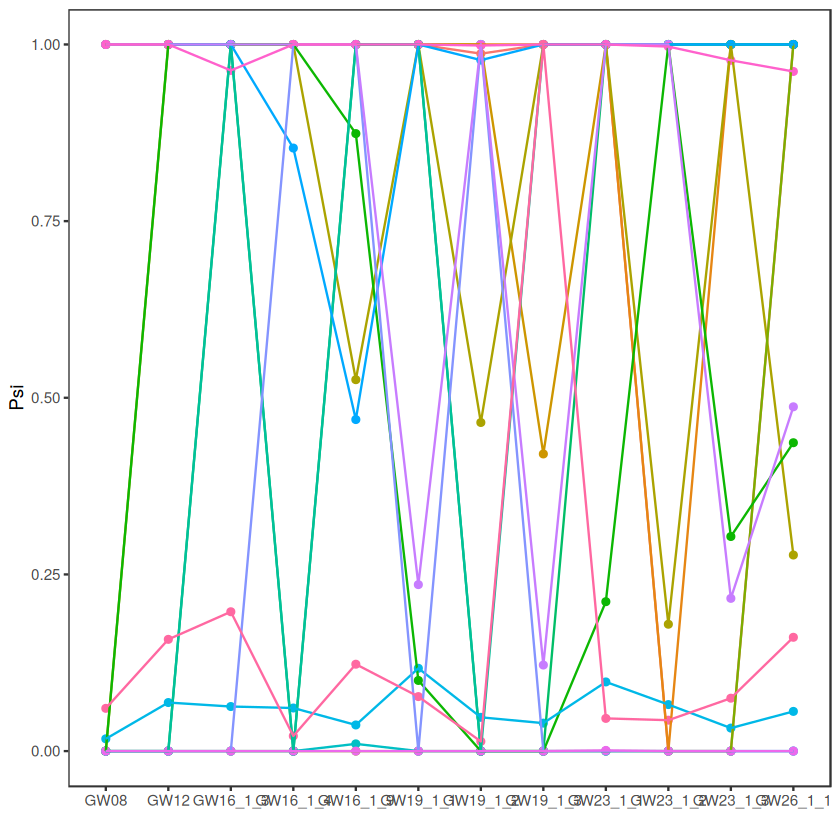

In [65]:
ggplot(data = data,aes(x=Week,y=Psi,group = AS_event,color=AS_event))+
  geom_point()+
  geom_line()+
  xlab("")+#横坐标名称
  ylab("Psi")+#纵坐标名称
  theme_bw() +#去掉背景灰色
  theme(panel.grid.major=element_line(colour=NA),
        panel.background = element_rect(fill = "transparent",colour = NA),
        plot.background = element_rect(fill = "transparent",colour = NA),
        panel.grid.minor = element_blank(),#以上theme中代码用于去除网格线且保留坐标轴边框
        legend.position = "none",#更改图例的位置，放至图内部的左上角
        legend.box.background = element_rect(color="black"))
#点击zoom查看大图


In [8]:
for(one in rownames(sub_A3_psi)){
    
}

[1] 18 12